In [ ]:
import pandas as pd
import numpy as np

import nltk
# nltk.download('stopwords')
# nltk.download('punkt_tab')

from nltk.corpus import stopwords
from gensim.corpora import Dictionary
from gensim.models import TfidfModel, Phrases

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud

import json


stop_words = set(stopwords.words('english'))
rdf = pd.read_csv('hw2_step2_reddit_posts.csv')
ps = PorterStemmer()


,Unnamed: 0,text,time_of_post,game,team,tokens,sentiment,team_performance
0,1170,THESE VAGABOND SHOESSSSSSS,2017-10-17,"['371016110', '371017110']",NYY,"['vagabond', 'shoesssssss']",0.256506,-2.0
1,844,Can we get candle flairs up in here,2020-09-05,"['401234674', '401226263']",NYY,"['get', 'candl', 'flair']",0.252788,-2.0
2,843,I drunk bought a pair of boosts tonight after ...,2020-09-05,"['401234674', '401226263']",NYY,"['drunk', 'bought', 'pair', 'boost', 'tonight'...",0.267658,-2.0
3,842,"Sorry, but I can't code in the scent of candle...",2020-09-05,"['401234674', '401226263']",NYY,"['sorri', ""n't"", 'code', 'scent', 'candl', 'css']",0.260223,-2.0
4,841,🕯🌸Pinstripe Peonies🌸🕯,2020-09-05,"['401234674', '401226263']",NYY,"['🕯🌸pinstrip', 'peonies🌸🕯']",0.256506,-2.0
...,...,...,...,...,...,...,...,...
6625,1499,#DAAAAAAAA JANKEES WIN!,2019-09-09,"['401076871', '401076886']",NYY,"['daaaaaaaa', 'janke', 'win']",0.260223,2.0
6626,1498,FAWK THOSE GUYS!!! #FEELSGOODMAN!!!,2019-09-09,"['401076871', '401076886']",NYY,"['fawk', 'guy', 'feelsgoodman']",0.256506,2.0
6627,1497,You love to see it,2019-09-09,"['401076871', '401076886']",NYY,"['love', 'see']",0.260223,2.0
6628,1494,Fuck Boston!,2019-09-09,"['401076871', '401076886']",NYY,"['fuck', 'boston']",0.252788,2.0


In [44]:
def text2tokens(text):
	stop_words = set(stopwords.words('english'))
	text = str(text)
	text = text.lower()
	textList = word_tokenize(text)
	textList = [word for word in textList if word not in stop_words and len(word) >= 3]

	textList = [ps.stem(word) for word in textList]
	return textList
    
def gen_bow(df, column):
	df['tokens'] = df[column].apply(text2tokens)
	dct = Dictionary(df['tokens'])
	dct.filter_extremes(no_below=5, no_above=0.5)
	df['bow'] = df['tokens'].apply(dct.doc2bow)
	worddict = {}
	for i in range(len(df)):
		for token in df.at[i,'bow']:
			if token in list(worddict.keys()):
				worddict[token] += 1
			else: 
				worddict[token] = 1

	df.drop('tokens', axis=1, inplace=True)	
	return df, worddict

,Unnamed: 0,text,time_of_post,game,team,tokens,sentiment,team_performance
0,1170,THESE VAGABOND SHOESSSSSSS,2017-10-17,"['371016110', '371017110']",NYY,"['vagabond', 'shoesssssss']",0.256506,-2.0
1,844,Can we get candle flairs up in here,2020-09-05,"['401234674', '401226263']",NYY,"['get', 'candl', 'flair']",0.252788,-2.0
2,843,I drunk bought a pair of boosts tonight after ...,2020-09-05,"['401234674', '401226263']",NYY,"['drunk', 'bought', 'pair', 'boost', 'tonight'...",0.267658,-2.0
3,842,"Sorry, but I can't code in the scent of candle...",2020-09-05,"['401234674', '401226263']",NYY,"['sorri', ""n't"", 'code', 'scent', 'candl', 'css']",0.260223,-2.0
4,841,🕯🌸Pinstripe Peonies🌸🕯,2020-09-05,"['401234674', '401226263']",NYY,"['🕯🌸pinstrip', 'peonies🌸🕯']",0.256506,-2.0
...,...,...,...,...,...,...,...,...
6625,1499,#DAAAAAAAA JANKEES WIN!,2019-09-09,"['401076871', '401076886']",NYY,"['daaaaaaaa', 'janke', 'win']",0.260223,2.0
6626,1498,FAWK THOSE GUYS!!! #FEELSGOODMAN!!!,2019-09-09,"['401076871', '401076886']",NYY,"['fawk', 'guy', 'feelsgoodman']",0.256506,2.0
6627,1497,You love to see it,2019-09-09,"['401076871', '401076886']",NYY,"['love', 'see']",0.260223,2.0
6628,1494,Fuck Boston!,2019-09-09,"['401076871', '401076886']",NYY,"['fuck', 'boston']",0.252788,2.0


,Unnamed: 0,text,time_of_post,game,team,tokens,sentiment,team_performance
0,1170,THESE VAGABOND SHOESSSSSSS,2017-10-17,"['371016110', '371017110']",NYY,"[[, ', v, a, g, a, b, o, n, d, ', ,, , ', s, ...",0.256506,-2.0
1,844,Can we get candle flairs up in here,2020-09-05,"['401234674', '401226263']",NYY,"[[, ', g, e, t, ', ,, , ', c, a, n, d, l, ', ...",0.252788,-2.0
2,843,I drunk bought a pair of boosts tonight after ...,2020-09-05,"['401234674', '401226263']",NYY,"[[, ', d, r, u, n, k, ', ,, , ', b, o, u, g, ...",0.267658,-2.0
3,842,"Sorry, but I can't code in the scent of candle...",2020-09-05,"['401234674', '401226263']",NYY,"[[, ', s, o, r, r, i, ', ,, , "", n, ', t, "", ...",0.260223,-2.0
4,841,🕯🌸Pinstripe Peonies🌸🕯,2020-09-05,"['401234674', '401226263']",NYY,"[[, ', 🕯, 🌸, p, i, n, s, t, r, i, p, ', ,, , ...",0.256506,-2.0
...,...,...,...,...,...,...,...,...
6625,1499,#DAAAAAAAA JANKEES WIN!,2019-09-09,"['401076871', '401076886']",NYY,"[[, ', d, a, a, a, a, a, a, a, a, ', ,, , ', ...",0.260223,2.0
6626,1498,FAWK THOSE GUYS!!! #FEELSGOODMAN!!!,2019-09-09,"['401076871', '401076886']",NYY,"[[, ', f, a, w, k, ', ,, , ', g, u, y, ', ,, ...",0.256506,2.0
6627,1497,You love to see it,2019-09-09,"['401076871', '401076886']",NYY,"[[, ', l, o, v, e, ', ,, , ', s, e, e, ', ]]",0.260223,2.0
6628,1494,Fuck Boston!,2019-09-09,"['401076871', '401076886']",NYY,"[[, ', f, u, c, k, ', ,, , ', b, o, s, t, o, ...",0.252788,2.0


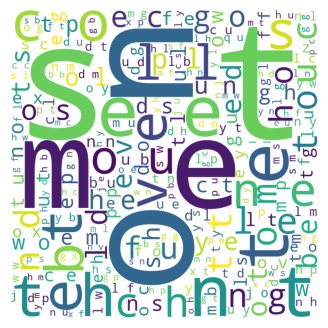

In [46]:
# text2tokens, gen_bow, porterstemmer
rdf = pd.read_csv('hw2_step2_reddit_posts.csv')


phraser = Phrases(rdf['tokens'], min_count=5, delimiter= '_')
display(rdf)
rdf['tokens'] = rdf['tokens'].apply(lambda tw: phraser[tw])

display(rdf)

words = []
for doc in rdf['tokens']:
	words.extend(doc)

wordcloud_text = ' '.join(words)
wordcloud = WordCloud(width=800, height=800,
					  background_color='white',
					  min_font_size=20
					  ).generate(wordcloud_text)
plt.figure(figsize=(4,4),facecolor= None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()